In [12]:
import holidays
us_holidays = holidays.US()
us_holidays

holidays.country_holidays('US')

In [ ]:
# ===============================================================
# Data Loading and Initial Preparation
# ===============================================================

import math
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import holidays

LINE = "=" * 40


def print_heading(heading_text):
    print()
    print(LINE)
    print(heading_text)
    print(LINE)
    print()


data_path = Path("hospital_patient_data.csv")

if not data_path.exists():
    raise FileNotFoundError(f"Could not find dataset at {data_path.resolve()}")


print_heading("Loading Hospital Patient Dataset")
print(f"Reading data from: {data_path.resolve()}")
df = pd.read_csv(data_path)
print(f"Loaded {len(df):,} rows and {len(df.columns)} columns.")

# === Handle missing values ===
print_heading("Handling Missing Values in Key Columns")
target_columns = ["alcohol_use", "comorbidities"]
available_columns = [col for col in target_columns if col in df.columns]
if available_columns:
    print(f"Replacing nulls with 'Unknown' for: {', '.join(available_columns)}")
    df[available_columns] = df[available_columns].fillna("Unknown")
else:
    print("None of the target columns are present in the dataset.")

# === Derive date-based features ===
print_heading("Deriving Date-Based Features")
required_date_columns = ["date_of_admission", "date_of_discharge"]
missing_date_columns = [col for col in required_date_columns if col not in df.columns]
if missing_date_columns:
    print(f"Missing expected date columns: {', '.join(missing_date_columns)}")
else:
    df["date_of_admission"] = pd.to_datetime(df["date_of_admission"], errors="coerce")
    df["date_of_discharge"] = pd.to_datetime(df["date_of_discharge"], errors="coerce")

    # Numeric date features
    df["length_of_stay"] = (df["date_of_discharge"] - df["date_of_admission"]).dt.days
    df["admission_month"] = df["date_of_admission"].dt.month
    df["admission_season"] = df["date_of_admission"].dt.month % 12 // 3 + 1
    df["admission_dayofweek"] = df["date_of_admission"].dt.dayofweek

    # Human-readable labels
    month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    season_labels = ['Winter', 'Spring', 'Summer', 'Fall']
    dow_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

    df["admission_month_label"] = df["admission_month"].map(dict(enumerate(month_labels, 1)))
    df["admission_season_label"] = df["admission_season"].map(dict(enumerate(season_labels, 1)))
    df["admission_dayofweek_label"] = df["admission_dayofweek"].map(dict(enumerate(dow_labels)))

    print(
        "Converted admission/discharge dates and created numeric + label columns for:"
        "\n - length_of_stay"
        "\n - admission_month / admission_month_label"
        "\n - admission_season / admission_season_label"
        "\n - admission_dayofweek / admission_dayofweek_label"
    )

    preview_cols = [
        "date_of_admission", "date_of_discharge", "length_of_stay",
        "admission_month", "admission_month_label",
        "admission_season", "admission_season_label",
        "admission_dayofweek", "admission_dayofweek_label",
    ]
    display(df[preview_cols].head())

# === General EDA ===
print_heading("Preview: First Five Rows")
pd.set_option('display.max_columns', None)
display(df.head())

print_heading("DataFrame Info")
df.info()

print_heading("DataFrame Shape")
print(df.shape)

print_heading("Missing Values Per Column")
print(df.isnull().sum())


print_heading("Summary Statistics")
summary = df.describe(include="all")
display(summary)

print_heading("Length of Stay Statistics")
summary = df['length_of_stay'].describe()
display(summary)





Loading Hospital Patient Dataset

Reading data from: /home/tim/projects/AI-07-FT01/lab-summative/hospital_patient_data.csv
Loaded 10,000 rows and 31 columns.

Handling Missing Values in Key Columns

Replacing nulls with 'Unknown' for: alcohol_use, comorbidities

Deriving Date-Based Features

Converted admission/discharge dates and created numeric + label columns for:
 - length_of_stay
 - admission_month / admission_month_label
 - admission_season / admission_season_label
 - admission_dayofweek / admission_dayofweek_label


,date_of_admission,date_of_discharge,length_of_stay,admission_month,admission_month_label,admission_season,admission_season_label,admission_dayofweek,admission_dayofweek_label
0,2024-09-19,2024-09-30,11,9,Sep,4,Fall,3,Thu
1,2025-04-14,2025-04-21,7,4,Apr,2,Spring,0,Mon
2,2024-12-21,2024-12-28,7,12,Dec,1,Winter,5,Sat
3,2024-07-17,2024-07-23,6,7,Jul,3,Summer,2,Wed
4,2025-03-25,2025-04-02,8,3,Mar,2,Spring,1,Tue



Preview: First Five Rows



,patient_id,age,gender,race_ethnicity,marital_status,insurance_type,employment_status,education_level,income_bracket,primary_diagnosis,diagnosis_code,comorbidities,emergency_admission,previous_admissions,medications_count,smoking_status,alcohol_use,bmi,systolic_bp,diastolic_bp,heart_rate,temperature,respiratory_rate,hospital_department,attending_physician_id,surgery_performed,icu_stay,date_of_admission,date_of_discharge,readmission_30day,patient_notes,length_of_stay,admission_month,admission_season,admission_dayofweek,admission_month_label,admission_season_label,admission_dayofweek_label
0,P000001,65,Female,Caucasian,Single,Medicare,Unknown,Bachelor's Degree,"$75,000-$100,000",Heart Failure,I50.9,Stroke History,False,0,1,Never Smoked,Heavy,31.8,138,83,87,36.6,12,Orthopedics,DRO6,False,True,2024-09-19,2024-09-30,False,Patient is a 65-year-old female presenting wit...,11,9,4,3,Sep,Fall,Thu
1,P000002,91,Male,African American,Widowed,Private,Retired,High School,"$25,000-$50,000",Diabetes with Complications,E11.65,Depression,True,4,3,Never Smoked,Social,32.8,127,74,87,37.7,16,Gastroenterology,DRG4,False,False,2025-04-14,2025-04-21,False,Patient is a 91-year-old male presenting with ...,7,4,2,0,Apr,Spring,Mon
2,P000003,49,Male,Hispanic/Latino,Widowed,Private,Unemployed,Bachelor's Degree,"$25,000-$50,000",Fracture of Femur,S72.90,Unknown,True,0,1,Unknown,Moderate,23.9,112,99,91,36.8,21,Nephrology,DRN7,False,False,2024-12-21,2024-12-28,False,"male patient, 49, presents with swelling, leg ...",7,12,1,5,Dec,Winter,Sat
3,P000004,28,Female,Caucasian,Married,Medicare,Retired,Some College,"$25,000-$50,000",Kidney Infection,N10,HIV,True,0,2,Never Smoked,Social,33.2,141,74,77,38.0,17,Neurology,DRN7,True,False,2024-07-17,2024-07-23,False,Patient is a 28-year-old female presenting wit...,6,7,3,2,Jul,Summer,Wed
4,P000005,74,Male,Caucasian,Separated,Other,Employed,High School,"$75,000-$100,000",Kidney Infection,N10,"Liver Disease, Rheumatoid Arthritis",False,2,7,Never Smoked,Heavy,32.2,113,88,93,36.7,17,Orthopedics,DRO7,True,False,2025-03-25,2025-04-02,False,"male patient, 74, presents with fever, dysuria...",8,3,2,1,Mar,Spring,Tue



DataFrame Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   patient_id                 10000 non-null  object        
 1   age                        10000 non-null  int64         
 2   gender                     10000 non-null  object        
 3   race_ethnicity             10000 non-null  object        
 4   marital_status             10000 non-null  object        
 5   insurance_type             10000 non-null  object        
 6   employment_status          10000 non-null  object        
 7   education_level            10000 non-null  object        
 8   income_bracket             10000 non-null  object        
 9   primary_diagnosis          10000 non-null  object        
 10  diagnosis_code             10000 non-null  object        
 11  comorbidities              10000 non-null  object  

,patient_id,age,gender,race_ethnicity,marital_status,insurance_type,employment_status,education_level,income_bracket,primary_diagnosis,diagnosis_code,comorbidities,emergency_admission,previous_admissions,medications_count,smoking_status,alcohol_use,bmi,systolic_bp,diastolic_bp,heart_rate,temperature,respiratory_rate,hospital_department,attending_physician_id,surgery_performed,icu_stay,date_of_admission,date_of_discharge,readmission_30day,patient_notes,length_of_stay,admission_month,admission_season,admission_dayofweek,admission_month_label,admission_season_label,admission_dayofweek_label
count,10000,10000.000000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000,10000,10000,10000,10000,10000,10000.00000,10000.000000,10000.000000,10000.000000,10000,10000,10000
unique,10000,NaN,3,6,6,5,5,6,6,18,18,2633,2,NaN,NaN,4,4,NaN,NaN,NaN,NaN,NaN,NaN,10,60,2,2,NaN,NaN,2,10000,NaN,NaN,NaN,NaN,12,4,7
top,P000001,NaN,Female,Caucasian,Married,Private,Employed,Some College,"$50,000-$75,000",Heart Failure,I50.9,Unknown,True,NaN,NaN,Never Smoked,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,General Medicine,DRG7,False,False,NaN,NaN,False,Patient is a 65-year-old female presenting wit...,NaN,NaN,NaN,NaN,Oct,Fall,Sun
freq,1,NaN,5062,6025,3950,3581,4512,2513,2489,1045,1045,1967,6000,NaN,NaN,4481,4598,NaN,NaN,NaN,NaN,NaN,NaN,3043,474,7486,7877,NaN,NaN,8522,1,NaN,NaN,NaN,NaN,915,2531,1478
mean,NaN,59.088600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.743000,3.332400,NaN,NaN,27.226830,127.596800,77.683700,79.553400,36.996750,15.509600,NaN,NaN,NaN,NaN,2024-11-12 18:56:44.159999744,2024-11-20 18:35:08.160000,NaN,NaN,7.98500,6.545300,2.503200,3.015800,NaN,NaN,NaN
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,16.500000,90.000000,50.000000,40.000000,35.500000,10.000000,NaN,NaN,NaN,NaN,2024-05-15 00:00:00,2024-05-18 00:00:00,NaN,NaN,1.00000,1.000000,1.000000,0.000000,NaN,NaN,NaN
25%,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,24.100000,117.000000,71.000000,71.000000,36.600000,13.000000,NaN,NaN,NaN,NaN,2024-08-15 00:00:00,2024-08-23 00:00:00,NaN,NaN,5.00000,4.000000,1.750000,1.000000,NaN,NaN,NaN
50%,NaN,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,3.000000,NaN,NaN,27.200000,128.000000,78.000000,79.000000,37.000000,15.000000,NaN,NaN,NaN,NaN,2024-11-13 00:00:00,2024-11-20 00:00:00,NaN,NaN,7.00000,7.000000,3.000000,3.000000,NaN,NaN,NaN
75%,NaN,75.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,5.000000,NaN,NaN,30.300000,138.000000,84.000000,88.000000,37.400000,17.000000,NaN,NaN,NaN,NaN,2025-02-11 00:00:00,2025-02-19 00:00:00,NaN,NaN,10.00000,10.000000,4.000000,5.000000,NaN,NaN,NaN
max,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,12.000000,NaN,NaN,45.000000,186.000000,110.000000,123.000000,39.000000,26.000000,NaN,NaN,NaN,NaN,2025-05-14 00:00:00,2025-06-10 00:00:00,NaN,NaN,33.00000,12.000000,4.000000,6.000000,NaN,NaN,NaN



Length of Stay Statistics



count    10000.00000
mean         7.98500
std          4.01188
min          1.00000
25%          5.00000
50%          7.00000
75%         10.00000
max         33.00000
Name: length_of_stay, dtype: float64

In [14]:
# ===============================================================
# Feature Engineering
# ===============================================================

print_heading("Feature Engineering")

# --- One-Hot Encode Comorbidities ------------------------------
if "comorbidities" in df.columns:
    df["comorbidities"] = df["comorbidities"].fillna("Unknown").astype(str)
    df["comorbidity_list"] = df["comorbidities"].str.split(",").apply(lambda x: [i.strip() for i in x])

    df_exploded = df.explode("comorbidity_list")
    comorbidity_dummies = (
        df_exploded[["patient_id", "comorbidity_list"]]
        .drop_duplicates()
        .assign(value=1)
        .pivot_table(index="patient_id", columns="comorbidity_list", values="value", fill_value=0)
    )

    comorbidity_dummies.columns = [f"comorb_{c}" for c in comorbidity_dummies.columns]
    df = df.merge(comorbidity_dummies, on="patient_id", how="left")

    print(f"Created {len(comorbidity_dummies.columns)} comorbidity indicator columns.")
else:
    print("No 'comorbidities' column found; skipping one-hot encoding.")

# --- Comorbidity Count -----------------------------------------
if any(col.startswith("comorb_") for col in df.columns):
    comorb_cols = [c for c in df.columns if c.startswith("comorb_")]
    df["comorbidity_count"] = df[comorb_cols].sum(axis=1)
    print("Added comorbidity_count feature.")
else:
    df["comorbidity_count"] = 0
    print("No comorbidity indicators found; defaulting comorbidity_count to 0.")

# --- Weekend / Holiday Admission Flag --------------------------
if "admission_dayofweek" in df.columns:
    df["is_weekend"] = df["admission_dayofweek"].isin([5, 6]).astype(int)
    print("Added is_weekend admission flag.")
else:
    print("No admission_dayofweek column; skipping weekend flag.")

# Optional: simple holiday flag placeholder (requires a holiday list)
try:
# Initialize U.S. holidays
    us_holidays = holidays.US(years=range(df["date_of_admission"].dt.year.min(),
                                      df["date_of_admission"].dt.year.max() + 1))
    # Then flag
    df["is_holiday"] = df["date_of_admission"].dt.date.isin(us_holidays).astype(int)
    print("Added is_holiday flag.")
except ImportError:
    df["is_holiday"] = 0
    print("holidays library not installed; is_holiday set to 0.")

# --- Age × Comorbidity Interaction ------------------------------
if "age" in df.columns:
    df["age_x_comorbidity"] = df["age"] * df["comorbidity_count"]
    print("Added age × comorbidity interaction term.")
else:
    print("No 'age' column; skipping interaction feature.")

# --- Medications per Diagnosis ---------------------------------
if {"medications_count", "primary_diagnosis"} <= set(df.columns):
    meds_per_diag = (
        df.groupby("primary_diagnosis")["medications_count"]
        .transform("mean")
        .replace(0, np.nan)
    )
    df["meds_per_diagnosis"] = df["medications_count"] / meds_per_diag
    df["meds_per_diagnosis"] = df["meds_per_diagnosis"].fillna(1)
    print("Added medications_per_diagnosis feature.")
else:
    df["meds_per_diagnosis"] = np.nan
    print("Missing columns for medications_per_diagnosis feature.")


Feature Engineering

Created 18 comorbidity indicator columns.
Added comorbidity_count feature.
Added is_weekend admission flag.
Added is_holiday flag.
Added age × comorbidity interaction term.
Added medications_per_diagnosis feature.



Distribution of Numeric and Engineered Numeric Features



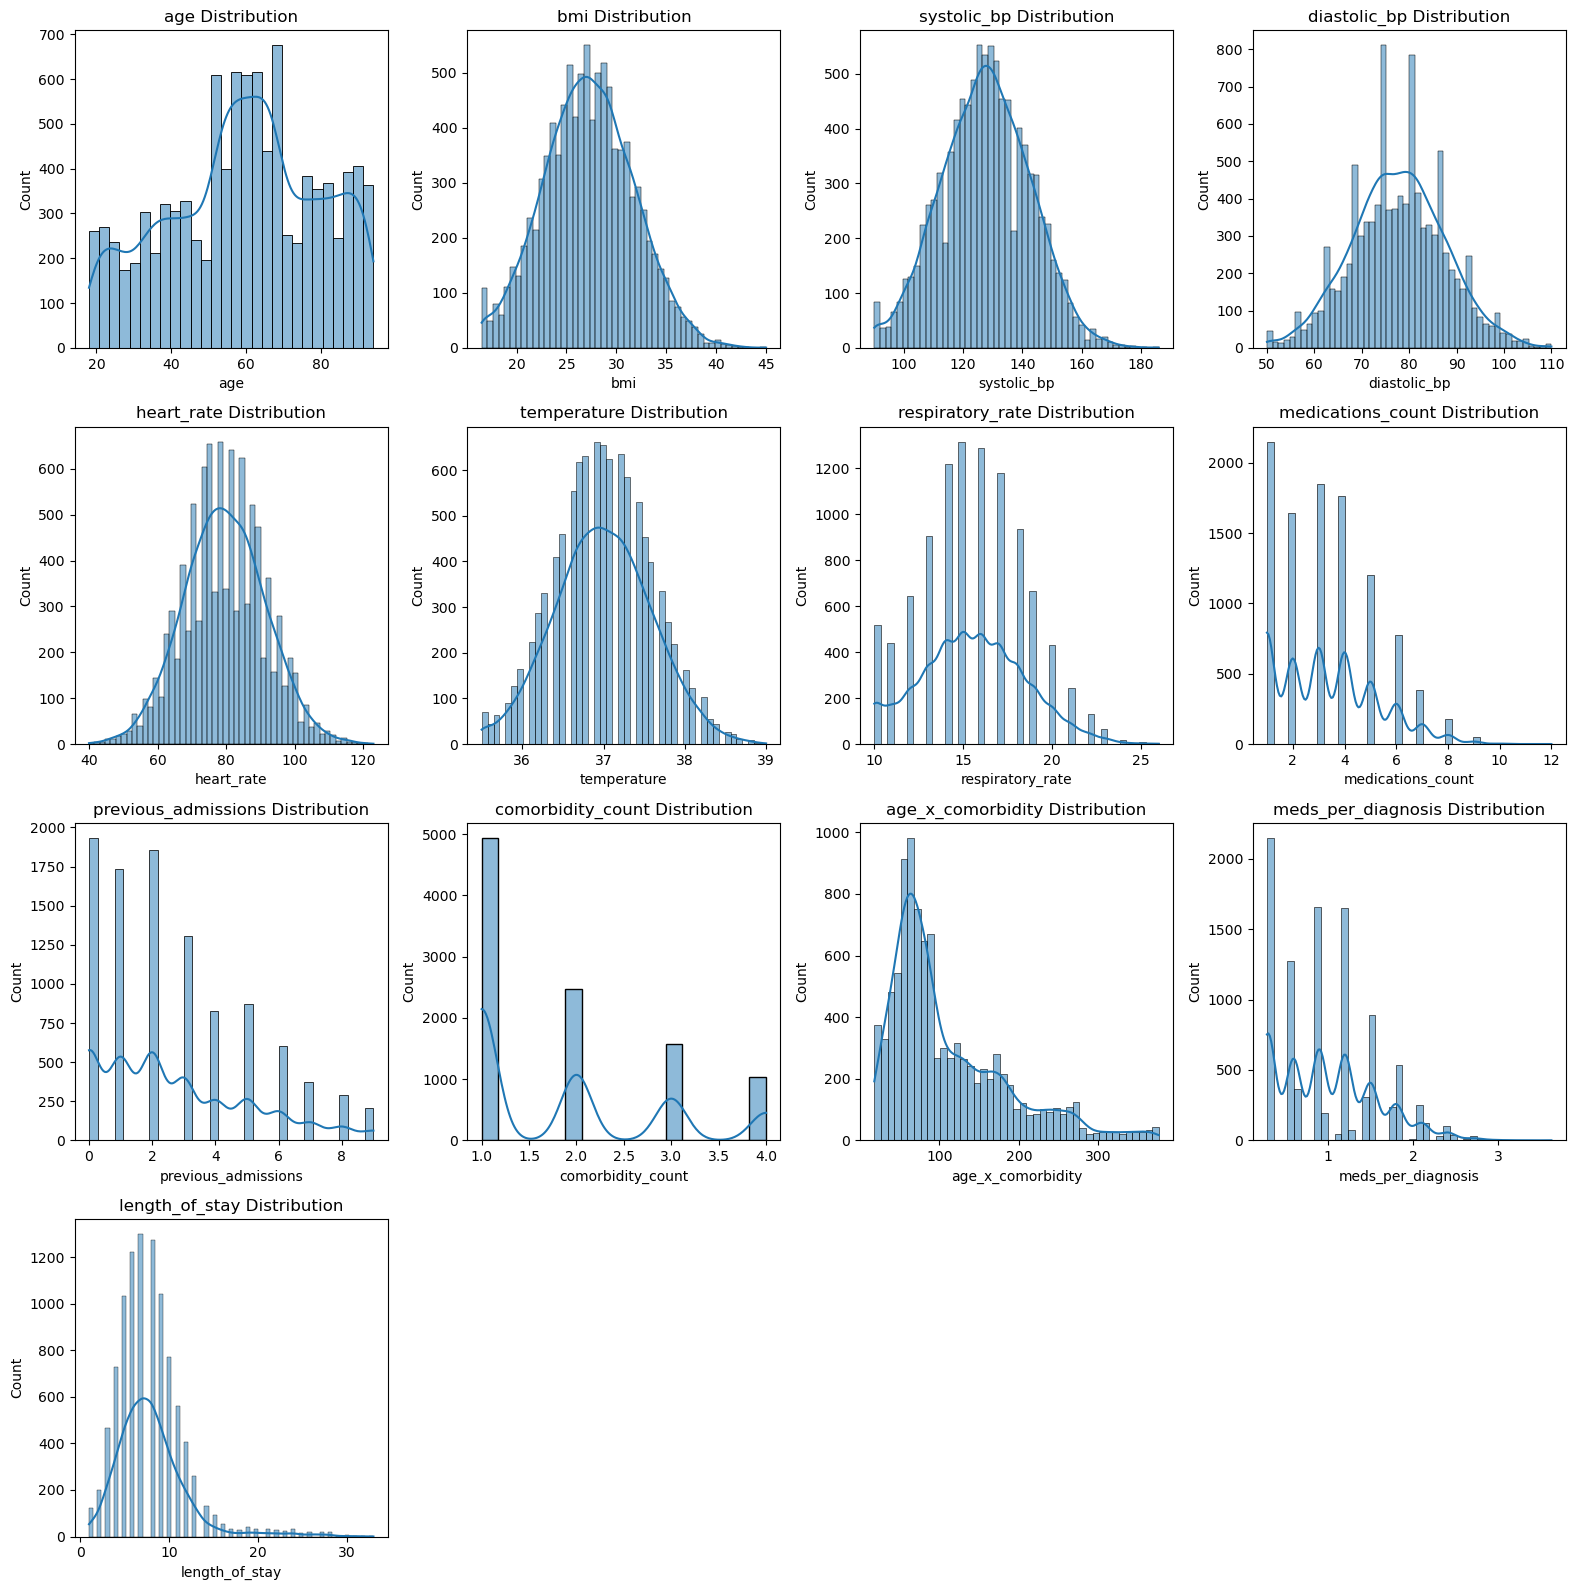


Scatterplots with Smoothing (Numeric & Engineered vs. LOS)



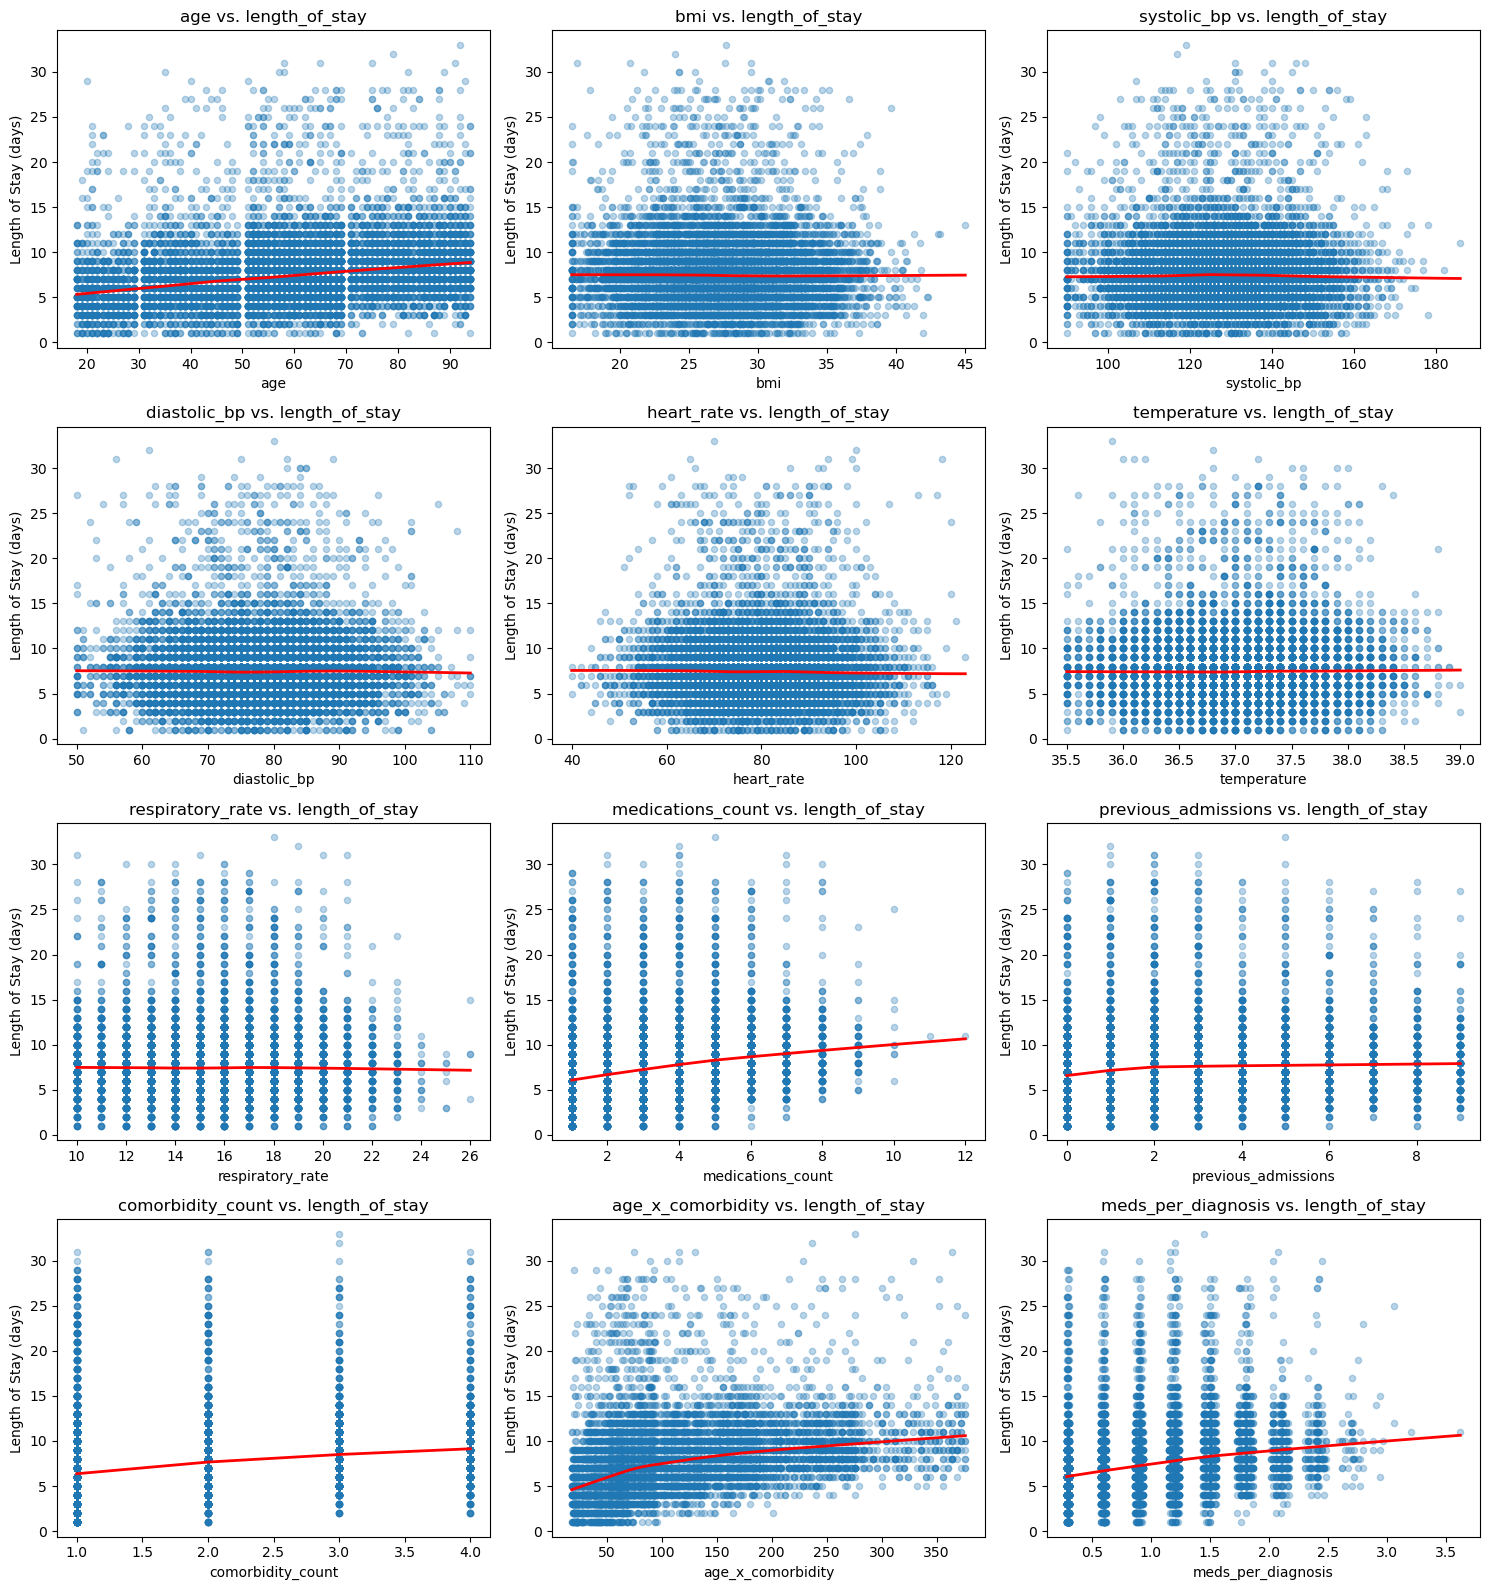


Correlation Matrix (Including Engineered Predictors)



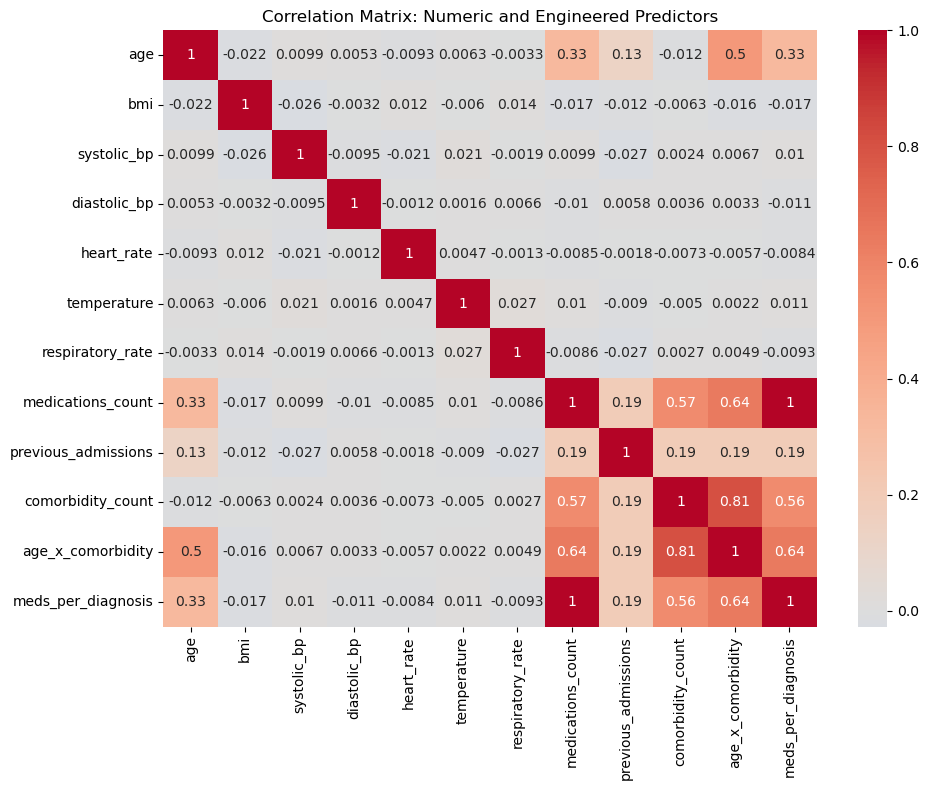


Feature–Target Correlations (Length of Stay)



,feature,pearson_r,spearman_r
10,age_x_comorbidity,0.323535,0.430711
9,comorbidity_count,0.253168,0.324636
7,medications_count,0.242536,0.304627
11,meds_per_diagnosis,0.242101,0.297529
0,age,0.228438,0.279962
8,previous_admissions,0.088068,0.125122
5,temperature,0.019541,0.014614
2,systolic_bp,0.003358,0.001433
3,diastolic_bp,-0.003755,0.000284
6,respiratory_rate,0.002320,0.000018


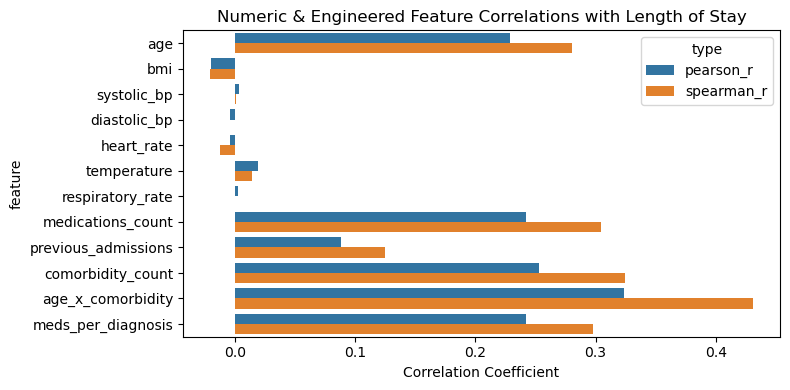

In [15]:
# ===============================================================
# Numeric Feature Analysis (Including Engineered Predictors)
# Target: Length of Stay
# ===============================================================

import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from scipy.stats import pearsonr, spearmanr

# === Numeric features (exclude date-derived categoricals) ===
numeric_cols = [
    'age', 'bmi', 'systolic_bp', 'diastolic_bp',
    'heart_rate', 'temperature', 'respiratory_rate',
    'medications_count', 'previous_admissions',
    # engineered numeric features
    'comorbidity_count', 'age_x_comorbidity', 'meds_per_diagnosis'
]

# filter to only those present in df (avoids KeyErrors if any missing)
numeric_cols = [c for c in numeric_cols if c in df.columns]

target = 'length_of_stay'

# === Helper: make dynamic subplot grids ===
def plot_grid(n, ncols=4):
    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 4*nrows))
    axes = axes.flatten()
    return fig, axes, nrows, ncols

# === 1. Distribution of Numeric Features ===
print_heading("Distribution of Numeric and Engineered Numeric Features")

fig, axes, _, _ = plot_grid(len(numeric_cols) + 1)
for ax, col in zip(axes, numeric_cols + [target]):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f"{col} Distribution")
for ax in axes[len(numeric_cols)+1:]:
    ax.set_visible(False)
plt.tight_layout()
plt.show()


# ===============================================================
# Scatterplots with Smoothing (Numeric Features vs. Length of Stay)
# ===============================================================

print_heading("Scatterplots with Smoothing (Numeric & Engineered vs. LOS)")

def plot_grid(n, ncols=3):
    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows))
    axes = axes.flatten()
    return fig, axes, nrows, ncols

fig, axes, _, _ = plot_grid(len(numeric_cols))
for ax, col in zip(axes, numeric_cols):
    sns.regplot(
        x=df[col],
        y=df[target],
        lowess=True,
        scatter_kws={"alpha": 0.3, "s": 20},
        line_kws={"color": "red", "lw": 2},
        ax=ax
    )
    ax.set_title(f"{col} vs. {target}")
    ax.set_xlabel(col)
    ax.set_ylabel("Length of Stay (days)")
for ax in axes[len(numeric_cols):]:
    ax.set_visible(False)
plt.tight_layout()
plt.show()


# === 3. Correlation Matrix Among Numeric Predictors ===
print_heading("Correlation Matrix (Including Engineered Predictors)")

corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix: Numeric and Engineered Predictors")
plt.tight_layout()
plt.show()


# === 4. Feature–Target Correlations ===
print_heading("Feature–Target Correlations (Length of Stay)")

corr_rows = []
for col in numeric_cols:
    x = df[col].astype(float)
    y = df[target].astype(float)
    mask = x.notna() & y.notna()
    if mask.sum() > 2:
        pearson_r, _ = pearsonr(x[mask], y[mask])
        spearman_r, _ = spearmanr(x[mask], y[mask])
        corr_rows.append((col, pearson_r, spearman_r))
    else:
        corr_rows.append((col, np.nan, np.nan))

corr_df = pd.DataFrame(corr_rows, columns=["feature", "pearson_r", "spearman_r"])
display(corr_df.sort_values("spearman_r", ascending=False))

plt.figure(figsize=(8, 4))
sns.barplot(
    data=corr_df.melt(id_vars='feature', var_name='type', value_name='r'),
    x='r', y='feature', hue='type', orient='h'
)
plt.title("Numeric & Engineered Feature Correlations with Length of Stay")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

## Numeric Data Analysis

Across the numeric features, the data show realistic hospital patterns with mostly clean, bell-shaped distributions for vitals like blood pressure, heart rate, and temperature. A few variables—medications_count, previous_admissions, and length_of_stay itself—are heavily right-skewed, reflecting the typical hospital dynamic where most patients have short stays and limited prior admissions, while a smaller subset experiences repeated or prolonged care.

The scatterplots confirm that length of stay remains largely flat across most numeric variables, with no strong linear or nonlinear trends. The lowess lines for vitals such as blood pressure, temperature, and respiratory rate are nearly horizontal, suggesting these measures have little direct influence on LOS.

Correlation results reinforce that point: the only meaningful relationships are with medications_count (ρ ≈ 0.30) and age (ρ ≈ 0.28), both modest but plausible—older patients and those taking more medications tend to stay longer. Previous_admissions shows a weaker positive link (ρ ≈ 0.12). All other numeric features are effectively uncorrelated (|ρ| < 0.03).

Overall, the numeric data are well-behaved and largely independent, providing a stable foundation for modeling but limited predictive power on their own. The most promising quantitative signals for longer hospital stays lie in age, medication load, and readmission history—factors likely intertwined with chronic or complex health profiles.


Categorical Feature Visualization (Mean LOS)



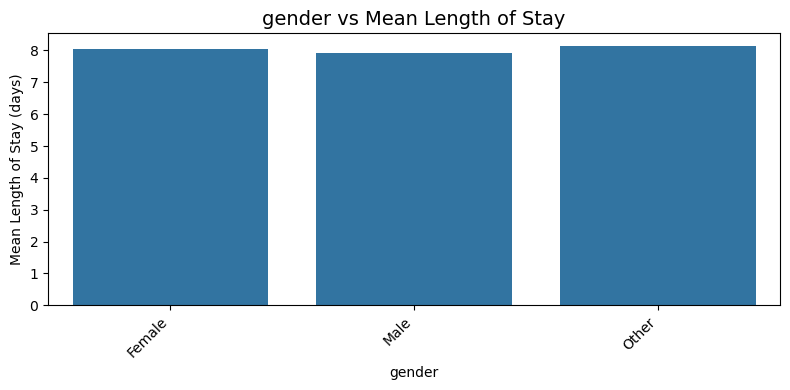

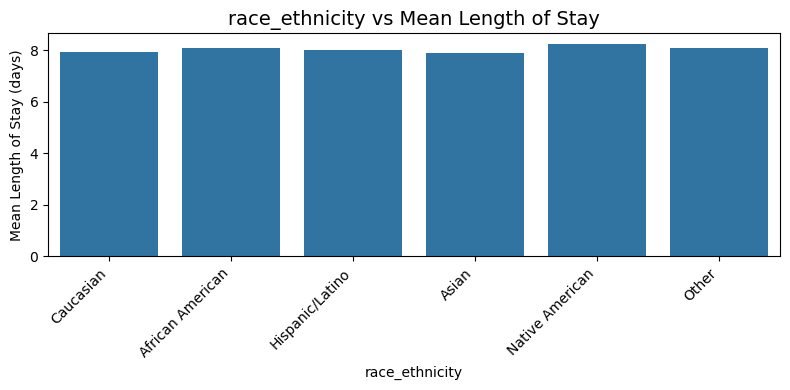

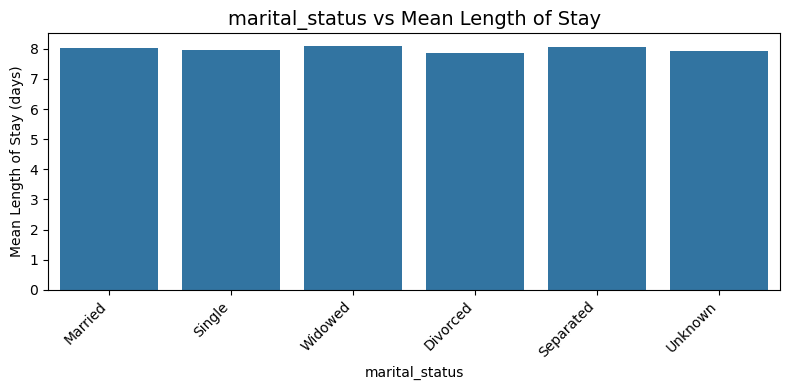

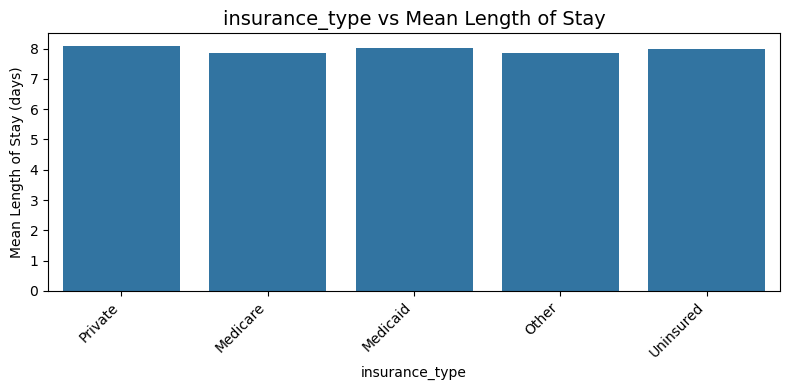

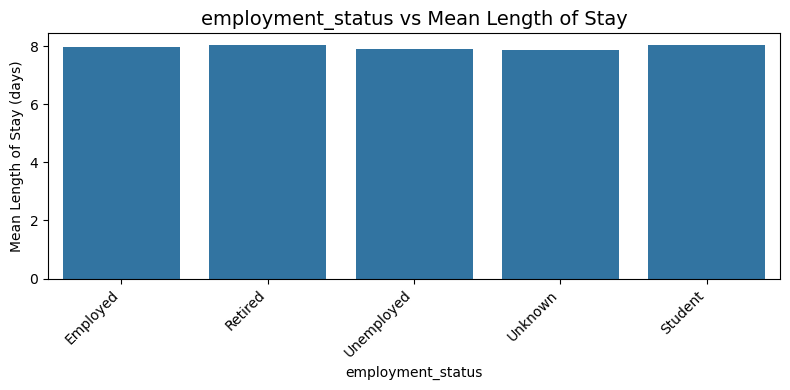

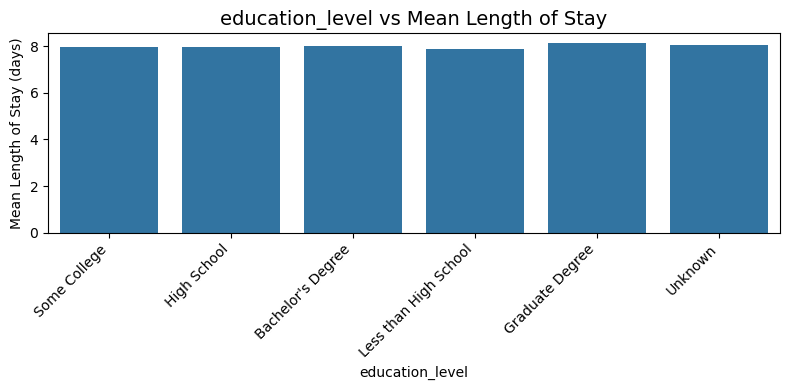

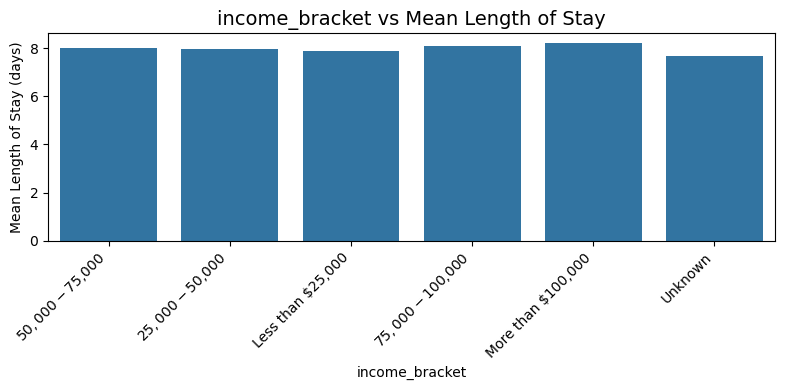

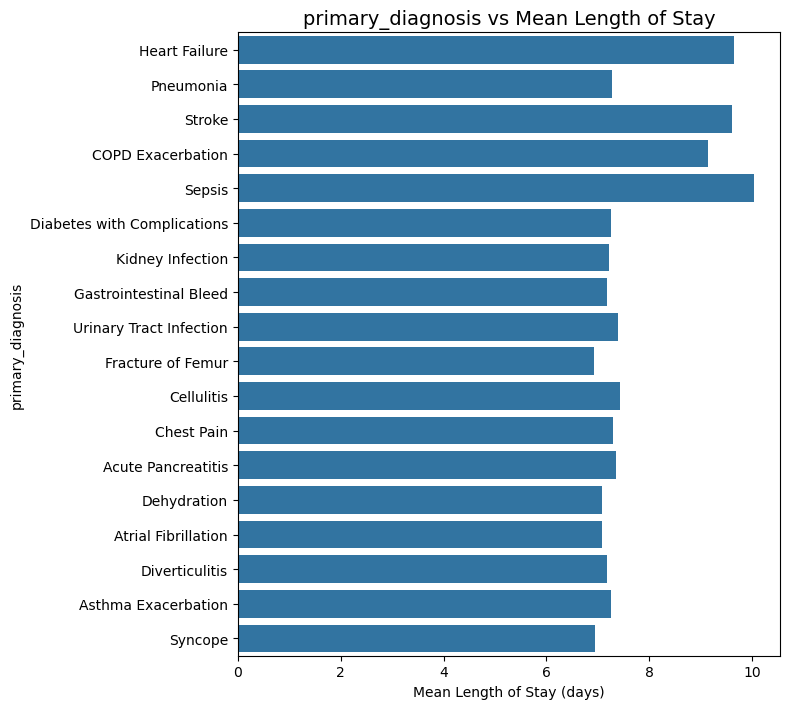

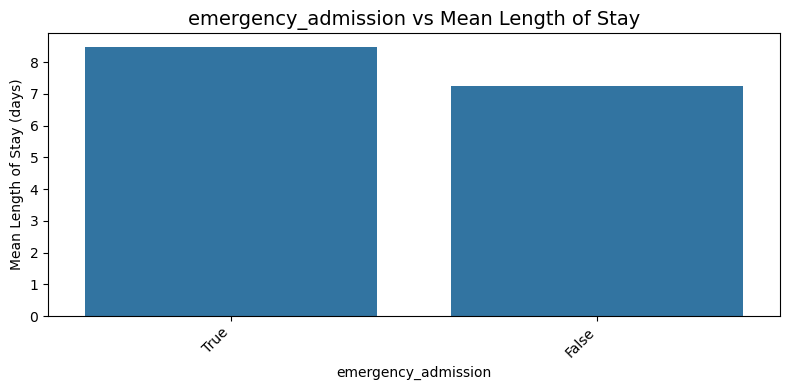

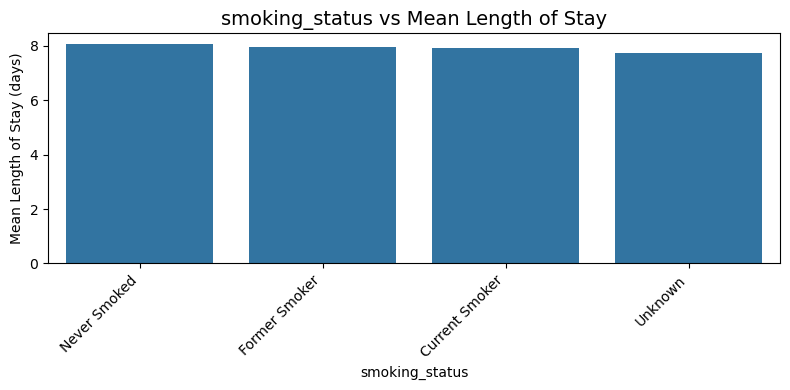

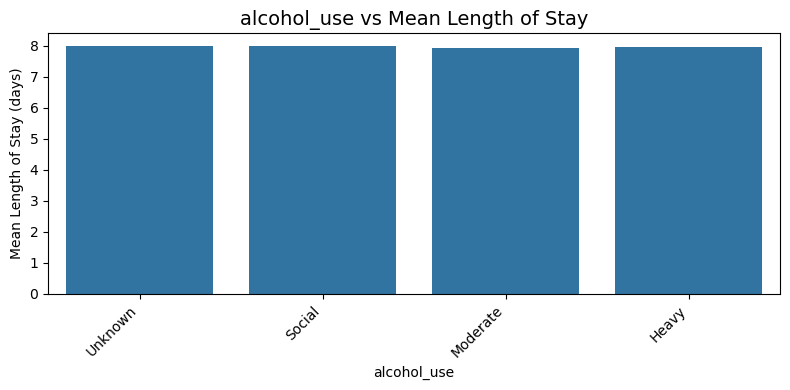

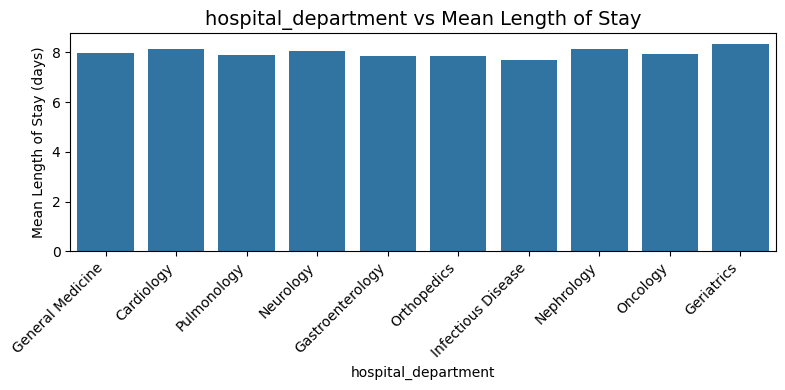

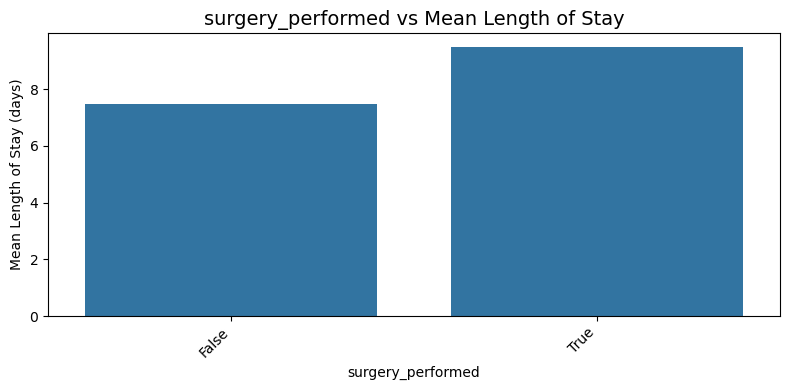

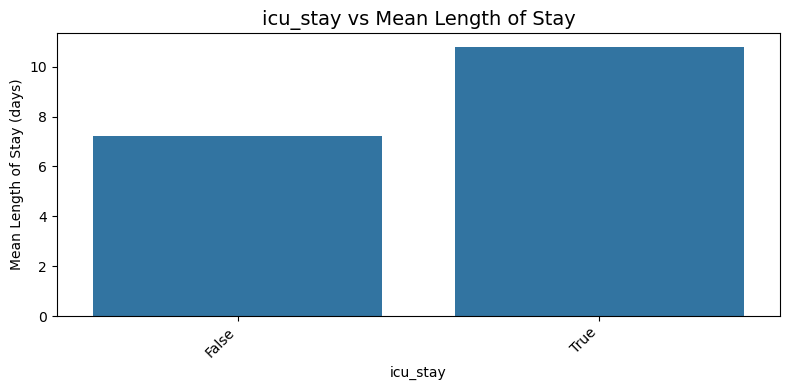

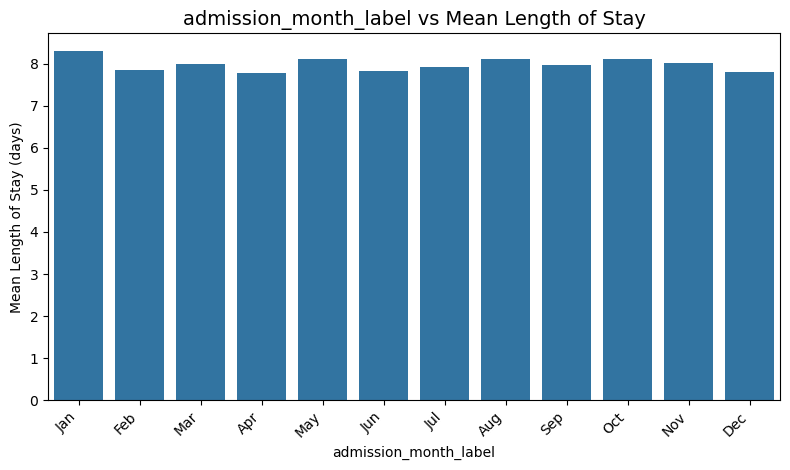

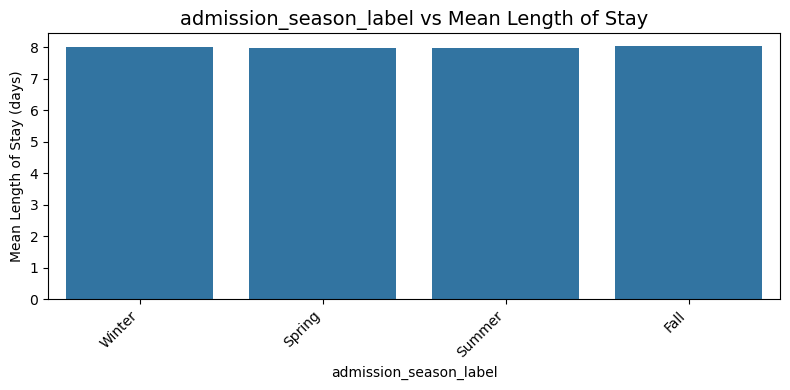

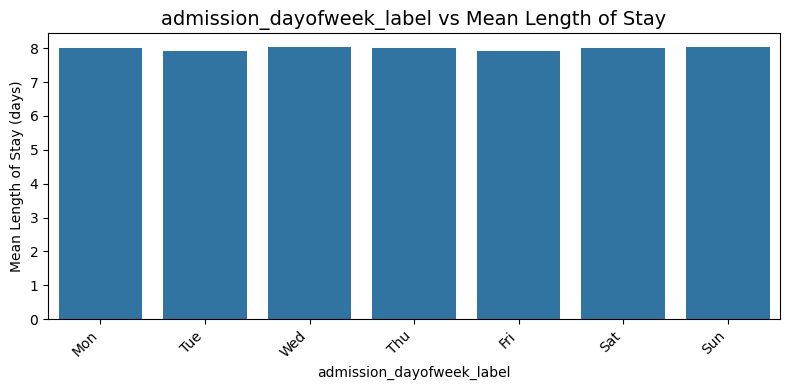

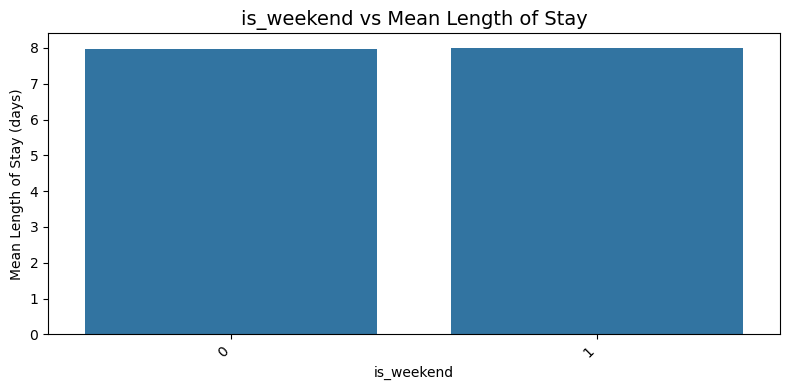

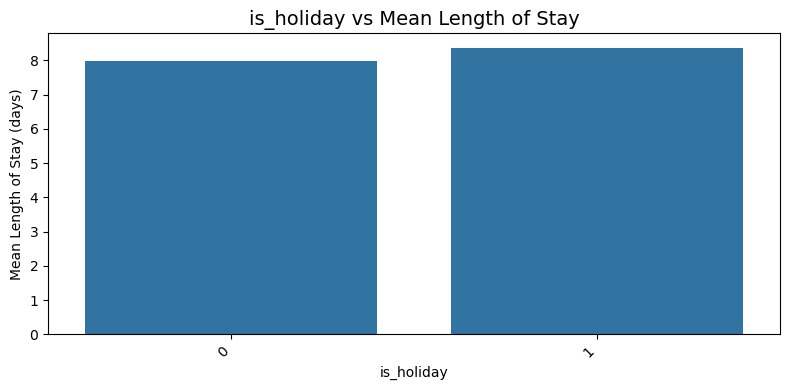


Categorical Effect Sizes (η² and Kruskal Tests)



,feature,eta_squared,p_ANOVA,p_Kruskal
13,icu_stay,0.132867,6.775782e-312,0.000000e+00
7,primary_diagnosis,0.079208,2.954202e-164,1.880231e-257
12,surgery_performed,0.047518,7.363533e-108,1.983883e-157
8,emergency_admission,0.023224,5.048407e-53,2.682879e-88
14,admission_month_label,0.001437,2.131591e-01,1.531188e-01
11,hospital_department,0.001281,1.715154e-01,5.190170e-01
6,income_bracket,0.000821,1.453025e-01,1.128491e-01
3,insurance_type,0.000701,1.356150e-01,1.519243e-01
9,smoking_status,0.000367,2.994195e-01,4.773002e-01
1,race_ethnicity,0.000363,6.042705e-01,3.395042e-01


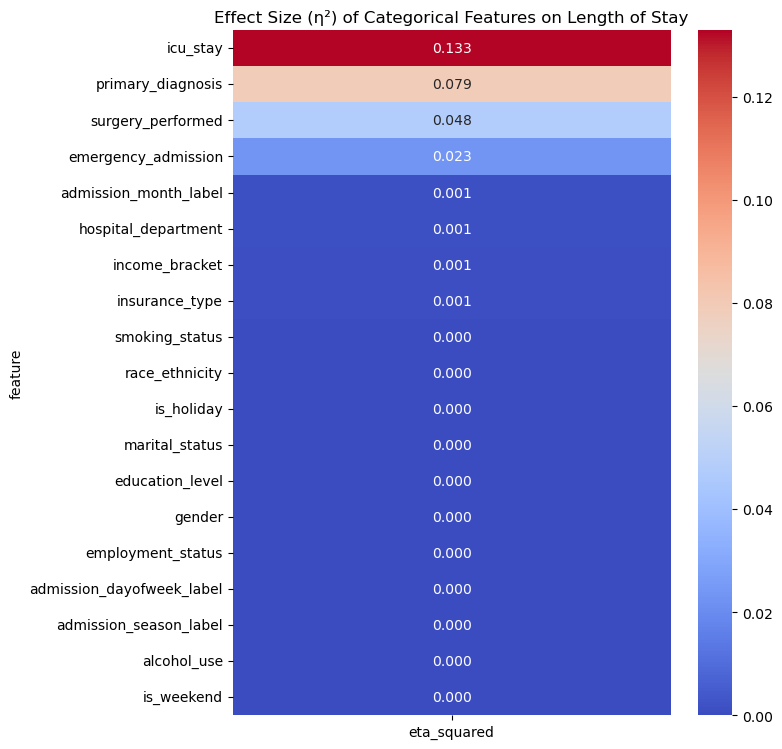

In [16]:
# ===============================================================
# Categorical Feature Analysis (Target: Length of Stay)
# ===============================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway, kruskal

target = 'length_of_stay'

# --- Step 1: Key Categorical Features --------------------------
categorical_cols = [
    'gender', 'race_ethnicity', 'marital_status', 'insurance_type',
    'employment_status', 'education_level', 'income_bracket',
    'primary_diagnosis', 'emergency_admission',
    'smoking_status', 'alcohol_use', 'hospital_department',
    'surgery_performed', 'icu_stay',
    'admission_month_label', 'admission_season_label', 'admission_dayofweek_label',
    # engineered binary flags
    'is_weekend', 'is_holiday'
]

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

print_heading("Categorical Feature Visualization (Mean LOS)")

for col in categorical_cols:
    if col not in df.columns:
        continue
    n_unique = df[col].nunique()
    fig_height = max(4, n_unique * 0.4)
    plt.figure(figsize=(8, fig_height))
    
    if col == 'admission_month_label':
        order = month_order
    elif col == 'admission_season_label':
        order = season_order
    elif col == 'admission_dayofweek_label':
        order = weekday_order
    elif df[col].dtype == 'int64' and df[col].nunique() == 2:
        order = [0, 1]
    else:
        order = df[col].value_counts().index

    if n_unique > 15:
        sns.barplot(y=df[col], x=df[target], order=order, estimator=np.mean,
                    errorbar=None, orient='h')
        plt.xlabel("Mean Length of Stay (days)")
        plt.ylabel(col)
    else:
        sns.barplot(x=df[col], y=df[target], order=order, estimator=np.mean,
                    errorbar=None)
        plt.ylabel("Mean Length of Stay (days)")
        plt.xlabel(col)
        plt.xticks(rotation=45, ha='right')

    plt.title(f"{col} vs Mean Length of Stay", fontsize=14)
    plt.tight_layout()
    plt.show()


# --- Step 2: Categorical Effect Sizes (η² and Kruskal Tests) ----
print_heading("Categorical Effect Sizes (η² and Kruskal Tests)")

def eta_squared(groups):
    all_vals = np.concatenate(groups)
    grand_mean = np.mean(all_vals)
    ssb = sum(len(g) * (np.mean(g) - grand_mean)**2 for g in groups)
    sst = ((all_vals - grand_mean)**2).sum()
    return ssb / sst if sst > 0 else np.nan

rows = []
for col in categorical_cols:
    if col not in df.columns:
        continue
    sub = df[[col, target]].dropna()
    groups = [g[target].values for _, g in sub.groupby(col) if len(g) > 1]
    if len(groups) < 2:
        continue
    try:
        F, p_anova = f_oneway(*groups)
        eta2 = eta_squared(groups)
    except Exception:
        eta2, p_anova = np.nan, np.nan
    try:
        H, p_kr = kruskal(*groups)
    except Exception:
        p_kr = np.nan
    rows.append((col, eta2, p_anova, p_kr))

effect_df = pd.DataFrame(rows, columns=["feature", "eta_squared", "p_ANOVA", "p_Kruskal"])
effect_df = effect_df.sort_values("eta_squared", ascending=False)
display(effect_df)

plt.figure(figsize=(8, max(3, 0.4 * len(effect_df))))
sns.heatmap(effect_df.set_index("feature")[["eta_squared"]],
            annot=True, fmt=".3f", cmap="coolwarm", vmin=0)
plt.title("Effect Size (η²) of Categorical Features on Length of Stay")
plt.tight_layout()
plt.show()

## Categorical EDA Analysis

Across categorical variables, **length of stay (LOS)** shows very little variation. Most demographic, socioeconomic, and behavioral categories cluster tightly around the same 7–8-day average, suggesting these traits have minimal impact on how long patients remain hospitalized.

The clearest differences appear in a few **clinical and procedural factors**. Patients admitted to the **ICU** tend to stay several days longer than those treated in standard wards, reflecting higher acuity and recovery demands. **Primary diagnosis** also matters — conditions such as sepsis, stroke, and heart failure are linked with extended stays, while routine or less severe diagnoses correspond to shorter recoveries. Similarly, patients who **undergo surgery** or are admitted through the **emergency department** stay modestly longer on average.

Beyond those features, LOS remains largely consistent. Gender, race, income, education, and lifestyle variables (like smoking or alcohol use) show almost no meaningful differences, and neither do seasonal or weekday admission patterns.

Overall, the categorical data align with the numeric findings: **hospital stay duration is remarkably uniform across most groups**, with meaningful variation driven mainly by medical complexity and care intensity rather than patient demographics or timing of admission.